# Helioseismic constraints on nuclear reaction rates 

**Author**: Earl Patrick Bellinger$^1$ ( bellinger@phys.au.dk )

$^1$*Stellar Astrophysics Centre, Aarhus University, Denmark*

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from uncertainties import ufloat, unumpy, umath

from scipy.interpolate import interp1d

import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider

import corner
import emcee

import io

from tqdm import tqdm_notebook as tqdm

In [2]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')

In [3]:
from ratios import *

## Load model and observed data and calculate rates 

In [4]:
# standard solar model 
DF = pd.read_table('std2/calibrate.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
DF

,l,n,nu,E,n_p,n_g
0,0,1,257.869627,4.673597e-04,1,0
1,0,2,403.413252,9.777538e-05,2,0
2,0,3,535.079682,2.385964e-05,3,0
3,0,4,679.484634,7.168617e-06,4,0
4,0,5,824.190764,2.450798e-06,5,0
...,...,...,...,...,...,...
140,3,29,4323.692430,2.128566e-10,29,0
141,3,30,4461.887590,1.970491e-10,30,0
142,3,31,4599.922960,1.807150e-10,31,0
143,3,32,4737.488690,1.631933e-10,32,0


In [5]:
r02s = r02(DF)
r10s = r10(DF)
r13s = r13(DF)
r02s

{'names': ['r02_2',
  'r02_3',
  'r02_4',
  'r02_5',
  'r02_6',
  'r02_7',
  'r02_8',
  'r02_9',
  'r02_10',
  'r02_11',
  'r02_12',
  'r02_13',
  'r02_14',
  'r02_15',
  'r02_16',
  'r02_17',
  'r02_18',
  'r02_19',
  'r02_20',
  'r02_21',
  'r02_22',
  'r02_23',
  'r02_24',
  'r02_25',
  'r02_26',
  'r02_27',
  'r02_28',
  'r02_29',
  'r02_30',
  'r02_31',
  'r02_32',
  'r02_33',
  'r02_34'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_2',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_0_27',
  'nu_0_28',
  'nu_0_29',
  'nu_0_3',
  'nu_0_30',
  'nu_0_31',
  'nu_0_32',
  'nu_0_33',
  'nu_0_34',
  'nu_0_4',
  'nu_0_5',
  'nu_0_6',
  'nu_0_7',
  'nu_0_8',
  'nu_0_9',
  'nu_1_1',
  'nu_1_10',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_2',
  'nu_1_20',
  'nu

In [6]:
# Model S
modelS_freqs = pd.read_table(os.environ['SCRIPTS_DIR'] + '/../modelS/modelS-freqs.dat', sep='\s+')
modelS_r02s = r02(modelS_freqs)
modelS_r10s = r10(modelS_freqs)
modelS_r13s = r13(modelS_freqs)
modelS_r02s

{'names': ['r02_2',
  'r02_3',
  'r02_4',
  'r02_5',
  'r02_6',
  'r02_7',
  'r02_8',
  'r02_9',
  'r02_10',
  'r02_11',
  'r02_12',
  'r02_13',
  'r02_14',
  'r02_15',
  'r02_16',
  'r02_17',
  'r02_18',
  'r02_19',
  'r02_20',
  'r02_21',
  'r02_22',
  'r02_23',
  'r02_24',
  'r02_25',
  'r02_26',
  'r02_27',
  'r02_28',
  'r02_29',
  'r02_30',
  'r02_31',
  'r02_32',
  'r02_33',
  'r02_34'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_2',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_0_27',
  'nu_0_28',
  'nu_0_29',
  'nu_0_3',
  'nu_0_30',
  'nu_0_31',
  'nu_0_32',
  'nu_0_33',
  'nu_0_34',
  'nu_0_4',
  'nu_0_5',
  'nu_0_6',
  'nu_0_7',
  'nu_0_8',
  'nu_0_9',
  'nu_1_1',
  'nu_1_10',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_2',
  'nu_1_20',
  'nu

In [7]:
# observed solar data 
obs_DF = pd.read_table('Sun-freqs.dat', sep='\s+')
obs_DF

,n,l,nu,dnu
0,6,0,972.613,0.002
1,7,1,1185.592,0.004
2,8,0,1263.162,0.012
3,8,1,1329.629,0.004
4,8,2,1394.680,0.011
...,...,...,...,...
74,26,2,3839.717,0.144
75,27,0,3846.993,0.177
76,27,1,3913.570,0.068
77,27,2,3976.930,0.298


In [8]:
obs_r02s = r02(obs_DF)
obs_r02s

{'names': ['r02_9',
  'r02_10',
  'r02_11',
  'r02_12',
  'r02_13',
  'r02_14',
  'r02_15',
  'r02_16',
  'r02_17',
  'r02_18',
  'r02_19',
  'r02_20',
  'r02_21',
  'r02_22',
  'r02_23',
  'r02_24',
  'r02_25',
  'r02_26',
  'r02_27'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_0_27',
  'nu_0_9',
  'nu_1_10',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_20',
  'nu_1_21',
  'nu_1_22',
  'nu_1_23',
  'nu_1_24',
  'nu_1_25',
  'nu_1_26',
  'nu_1_27',
  'nu_1_8',
  'nu_1_9',
  'nu_2_10',
  'nu_2_11',
  'nu_2_12',
  'nu_2_13',
  'nu_2_14',
  'nu_2_15',
  'nu_2_16',
  'nu_2_17',
  'nu_2_18',
  'nu_2_19',
  'nu_2_20',
  'nu_2_21',
  'nu_2_22',
  'nu_2_23',
  'nu_2_24',
  'nu_2_25',
  'nu_2_26',
  'nu_2_8',
  'nu_2_9'},
 'fr

In [9]:
perturb = get_ratios(r02, obs_DF, n_perturb=1000, seed=0, progress=True)
std_r02s = np.std(perturb, axis=0)
std_r02s

100%|██████████| 1000/1000 [00:44<00:00, 22.71it/s]


array([1.10951700e-04, 9.25194647e-05, 1.01204578e-04, 1.01187960e-04,
       1.29435688e-04, 1.47033858e-04, 1.71821597e-04, 1.81300282e-04,
       1.94662455e-04, 1.66785390e-04, 1.72001584e-04, 1.62158277e-04,
       1.70274331e-04, 1.96147644e-04, 2.40404334e-04, 3.23727025e-04,
       4.80461201e-04, 8.10478918e-04, 1.66061012e-03])

In [10]:
obs_r13s = r13(obs_DF)
perturb_r13 = get_ratios(r13, obs_DF, n_perturb=1000, seed=0, progress=True)
std_r13s = np.std(perturb_r13, axis=0)

In [11]:
obs_r10s = r10(obs_DF)
perturb_r10 = get_ratios(r10, obs_DF, n_perturb=1000, seed=0, progress=True)
std_r10s = np.std(perturb_r10, axis=0)

In [12]:
rs = np.hstack((perturb, perturb_r13, perturb_r10))
Sigma = np.cov(rs.T)
Sigma_inv = np.linalg.inv(Sigma)

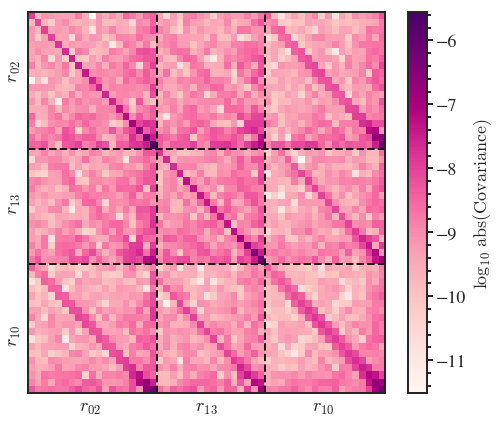

In [13]:
#plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(8, 7))
cax = ax.matshow(np.log10(np.abs(Sigma)), cmap=matplotlib.cm.RdPu, aspect='auto')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axhline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
plt.ylabel(r'$r_{10}\quad\quad\quad\quad\quad\quad\quad r_{13}\quad\quad\quad\quad\quad\quad\quad r_{02}$')
plt.xlabel(r'$r_{02}\quad\quad\quad\quad\quad\quad      r_{13}\quad\quad\quad\quad\quad\quad      r_{10}$', labelpad=7)
fig.colorbar(cax, label=r'$\log_{10}~\rm{abs}(\rm{Covariance})$');

542.1436093190039


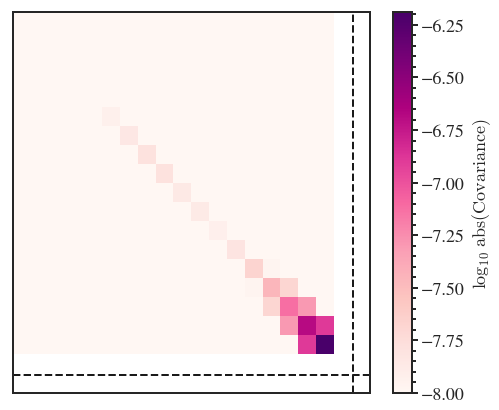

In [96]:
SSM_r02_spl = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')#(obs_r02s['freqs'])
SSM_r13_spl = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')#(obs_r13s['freqs'])
SSM_r10_spl = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')#(obs_r10s['freqs'])
rs_rd = []
for ii in range(perturb.shape[0]):
    SSM_r02 = SSM_r02_spl(perturb[ii])
    SSM_r13 = SSM_r13_spl(perturb_r13[ii])
    SSM_r10 = SSM_r10_spl(perturb_r10[ii])
    rs_rd += [np.hstack(( #(perturb[ii]     - SSM_r02)/SSM_r02,
                          #(perturb_r13[ii] - SSM_r13)/SSM_r13,
                          (perturb_r10[ii] - SSM_r10)/SSM_r10
                        ))]

rs_rd = np.array(rs_rd)

Sigma = np.cov(rs_rd.T)
Sigma_inv = np.linalg.inv(Sigma)

print(np.linalg.cond(Sigma))

logSigma = np.log10(np.abs(Sigma))

fig, ax = plt.subplots(figsize=(8, 7))
cax = ax.matshow(logSigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=-8, vmax=np.max(logSigma))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
#plt.axhline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
#plt.axvline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
#plt.ylabel(r'$r_{10}\quad\quad\quad\quad\quad\quad\quad r_{02}$')
#plt.xlabel(r'$r_{02}\quad\quad\quad\quad\quad\quad      r_{10}$', labelpad=7)
fig.colorbar(cax, label=r'$\log_{10}~\rm{abs}(\rm{Covariance})$');

In [14]:
SSM_r02_spl = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')#(obs_r02s['freqs'])
SSM_r13_spl = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')#(obs_r13s['freqs'])
SSM_r10_spl = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')#(obs_r10s['freqs'])
rs_rd = []
for ii in range(perturb.shape[0]):
    SSM_r02 = SSM_r02_spl(perturb[ii])
    SSM_r13 = SSM_r13_spl(perturb_r13[ii])
    SSM_r10 = SSM_r10_spl(perturb_r10[ii])
    rs_rd += [np.hstack(( (perturb[ii]     - SSM_r02)/SSM_r02,
                          (perturb_r13[ii] - SSM_r13)/SSM_r13,
                          (perturb_r10[ii] - SSM_r10)/SSM_r10
                        ))]

rs_rd = np.array(rs_rd)

In [16]:
Sigma = np.cov(rs_rd.T)
Sigma_inv = np.linalg.inv(Sigma)

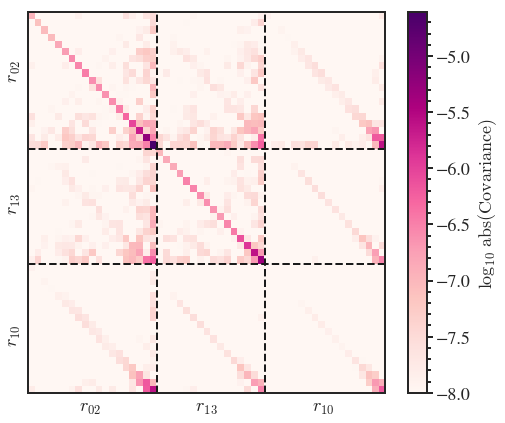

In [17]:
logSigma = np.log10(np.abs(Sigma))

fig, ax = plt.subplots(figsize=(8, 7))
cax = ax.matshow(logSigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=-8, vmax=np.max(logSigma))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axhline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1] + perturb_r13.shape[1] - 0.4, c='k', ls='--')
plt.ylabel(r'$r_{10}\quad\quad\quad\quad\quad\quad\quad r_{13}\quad\quad\quad\quad\quad\quad\quad r_{02}$')
plt.xlabel(r'$r_{02}\quad\quad\quad\quad\quad\quad      r_{13}\quad\quad\quad\quad\quad\quad      r_{10}$', labelpad=7)
fig.colorbar(cax, label=r'$\log_{10}~\rm{abs}(\rm{Covariance})$');

In [18]:
all_ratios_obs = np.hstack((obs_r02s['ratios'], obs_r13s['ratios'], obs_r10s['ratios']))
all_ratios_obs

array([0.08938871, 0.08917325, 0.08833544, 0.08756867, 0.08565197,
       0.08394673, 0.08204336, 0.07908564, 0.07716726, 0.07452398,
       0.07197911, 0.06986654, 0.0672388 , 0.06516345, 0.06249169,
       0.06076957, 0.05826354, 0.05617459, 0.05330286, 0.14605393,
       0.14593028, 0.14457386, 0.13957692, 0.13663287, 0.13393117,
       0.13112481, 0.12883555, 0.12516918, 0.12149318, 0.11776712,
       0.11460434, 0.11218514, 0.10865714, 0.10593741, 0.10702821,
       0.03895667, 0.03732533, 0.03843778, 0.03504345, 0.03410527,
       0.03288632, 0.02966581, 0.02918747, 0.0276036 , 0.02588419,
       0.02510287, 0.02308472, 0.02241795, 0.02141277, 0.02026803,
       0.0200716 , 0.01692816, 0.01320207])

In [19]:
SSM_r02 = SSM_r02_spl(obs_r02s['freqs'])
SSM_r13 = SSM_r13_spl(obs_r13s['freqs'])
SSM_r10 = SSM_r10_spl(obs_r10s['freqs'])
rel_ratios_obs = np.hstack(( (obs_r02s['ratios'] - SSM_r02)/SSM_r02,
                             (obs_r13s['ratios'] - SSM_r13)/SSM_r13,
                             (obs_r10s['ratios'] - SSM_r10)/SSM_r10 ))
rel_ratios_obs

array([-1.71938998e-02, -1.29824690e-02, -1.45628154e-02, -1.28249168e-02,
       -1.07583277e-02, -1.05670646e-02, -4.97883815e-03, -8.58344032e-03,
       -4.12278576e-03, -3.61691421e-03, -4.14030133e-03, -2.01277840e-04,
       -1.42400255e-03,  9.16765708e-04, -6.10614832e-03,  7.36792211e-04,
       -8.74107786e-03, -1.13498092e-02, -3.14519961e-02, -6.30785903e-03,
       -1.35228210e-02, -7.46947531e-03, -9.66284927e-03, -1.22294249e-02,
       -4.15193800e-03, -9.18844344e-03, -9.20675944e-03, -3.05731439e-03,
       -5.92999020e-03, -7.28887360e-03, -4.19494636e-03, -9.73210691e-04,
       -7.07382816e-04,  3.68271220e-03,  4.44791124e-02,  1.89297606e-03,
       -3.40757573e-02, -6.24198248e-03, -3.31652957e-03, -2.53372155e-02,
        9.55976039e-03, -1.45203791e-02, -1.90642605e-02,  1.65489509e-02,
       -8.22188302e-04,  7.46918659e-03,  7.77167061e-03, -2.23552485e-04,
        1.16014054e-02,  1.06373384e-02,  2.40125068e-02, -8.03684709e-02,
       -2.63861564e-01])

# Plot the effects of changing rates on the SSM 

In [20]:
freqs = np.linspace(np.min(r02s['freqs']), np.max(r02s['freqs']), 1000)
freqs = np.linspace(1300, 3950, 1000)

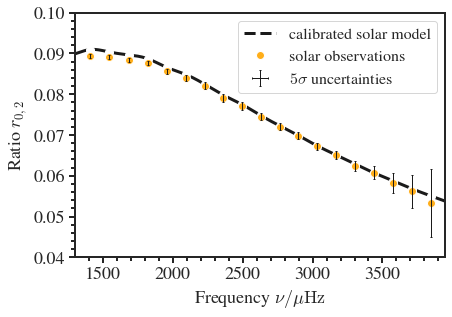

In [21]:
plt.plot(freqs, interp1d(r02s['freqs'], r02s['ratios'], kind=3)(freqs), '-', c='k', lw=3)
plt.plot(-1, -1, 'k--', label='calibrated solar model', lw=3)
#plt.plot(r02s['freqs'], r02s['ratios'], 'w.', ms=14)
plt.plot(obs_r02s['freqs'], 
         interp1d(r02s['freqs'], r02s['ratios'], kind=3)(obs_r02s['freqs']), 
         'w.', ms=16)

plt.plot(obs_r02s['freqs'], obs_r02s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r02s['freqs'], obs_r02s['ratios'], yerr=std_r02s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.04, 0.1])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $r_{0,2}$')
plt.show()

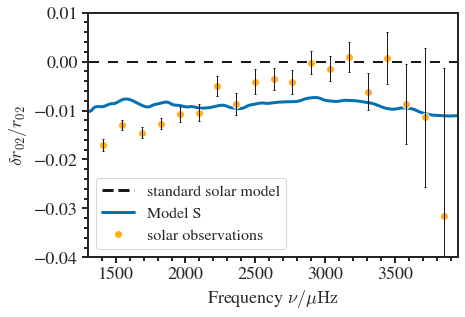

In [22]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=16)
plt.plot(-1, -1, 'k--', label='standard solar model', lw=3)

interp = interp1d(modelS_r02s['freqs'], modelS_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c='#0571b0', zorder=0, label='Model S')

SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=16, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
         markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1)

plt.legend(loc='lower left')

plt.ylim([-0.04, 0.01])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')
plt.show()

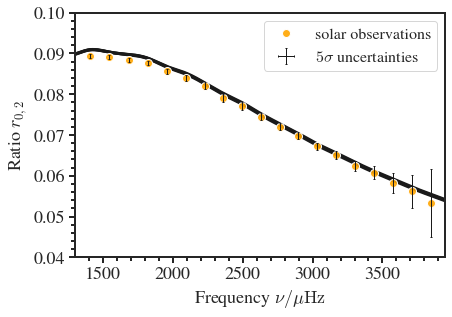

In [23]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)

for ii in range(-5, 1, 1):
    if ii % 2 == 0:
        continue
    rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r02s = r02(rate_DF)
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)
    plt.plot(freqs, interp, '-', c='k', lw=3)

plt.plot(obs_r02s['freqs'], obs_r02s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r02s['freqs'], obs_r02s['ratios'], yerr=std_r02s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.04, 0.1])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $r_{0,2}$')
plt.show()

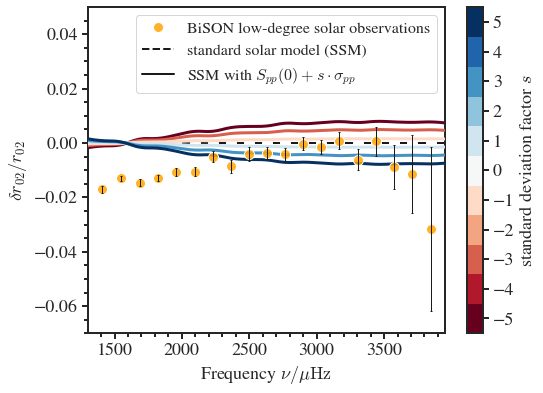

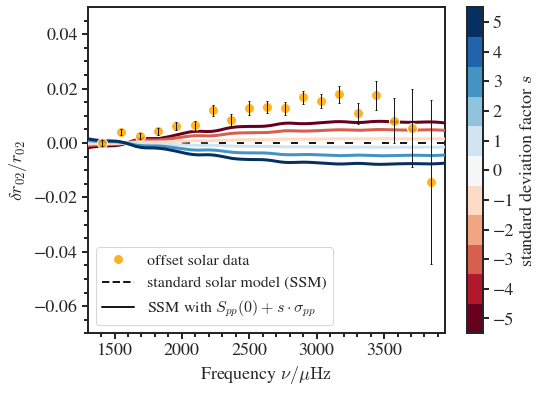

In [24]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

for offset in [0, 0.017]:

    fig, ax = plt.subplots(figsize=(8,6))

    ### plot models at different sigmas 
    sigmas = range(-5, 6, 1)#range(-5, 6, 1)
    for ii in sigmas:
        if ii % 2 == 0: 
            continue 
        rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
            names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
        rate_r02s = r02(rate_DF)
        interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
        plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        #plt.plot(rate_r02s['freqs'], rate_r02s['ratios'], 'k.')

    ### plot solar data 
    SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
    obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
    #obs_ = (obs_-SSM_)/SSM_ #+ 0.017
    obs_ = (obs_-SSM_)/SSM_ + offset
    lab = 'BiSON low-degree solar observations'
    if offset > 0:
        lab = 'offset solar data'
    plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
             markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
             markeredgecolor='white', label=lab, zorder=100)
    plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                 fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

    ### SSM at y=0
    #plt.axhline(0, ls='--', c='k', zorder=99)
    plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
    plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
    plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

    plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

    cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
    cbar.ax.minorticks_off()
    plt.legend()

    #plt.axvline(3090, ls='--', c='k')
    #ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

    ax.set_rasterization_zorder(9999)
    plt.ylim([-0.07, 0.05])
    plt.xlim([1300, 3950])
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    plt.ylabel(r'$\delta r_{02} / r_{02}$')
    #plt.show()
    
    filename = 'S02_r02'
    if offset: 
        filename += '_offset'
    plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
    plt.show()

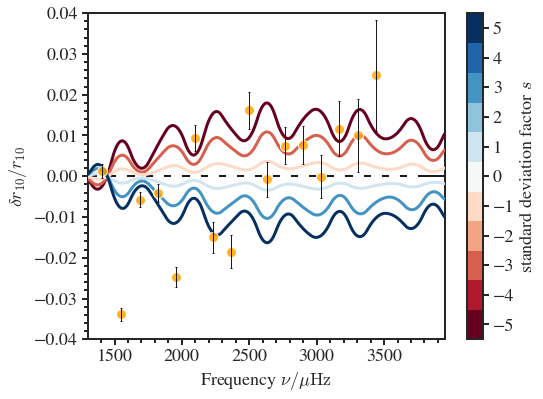

In [25]:
SSM = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(figsize=(8,6))

### plot models at different sigmas 
sigmas = range(-5, 6, 1)#range(-5, 6, 1)
for ii in sigmas:
    if ii % 2 == 0: 
        continue 
    rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r10s = r10(rate_DF)
    interp = interp1d(rate_r10s['freqs'], rate_r10s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)

### plot solar data 
SSM_ = interp1d(r10s['freqs'], r10s['ratios'], kind=1, fill_value='extrapolate')(obs_r10s['freqs'])
obs_ = unumpy.uarray(obs_r10s['ratios'], std_r10s)
#obs_ = (obs_-SSM_)/SSM_ #+ 0.017
obs_ = (obs_-SSM_)/SSM_ #+ 0.017
plt.plot(obs_r10s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
         markeredgecolor='white', label='BiSON low-degree solar observations', zorder=100)
plt.errorbar(obs_r10s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

### SSM at y=0
#plt.axhline(0, ls='--', c='k', zorder=99)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
plt.plot(obs_r10s['freqs'], np.repeat(0, len(obs_r10s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
cbar.ax.minorticks_off()
#plt.legend()

#plt.axvline(3090, ls='--', c='k')
#ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

plt.ylim([-0.04, 0.04])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{10} / r_{10}$')
plt.savefig('S0_r10.png', bbox_inches='tight', dpi=400)
plt.show()

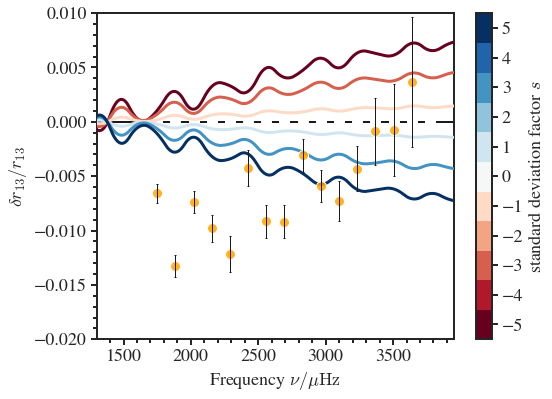

In [26]:
SSM = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(figsize=(8,6))

### plot models at different sigmas 
sigmas = range(-5, 6, 1)#range(-5, 6, 1)
for ii in sigmas:
    if ii % 2 == 0: 
        continue 
    rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r13s = r13(rate_DF)
    interp = interp1d(rate_r13s['freqs'], rate_r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
    #plt.plot(rate_r13s['freqs'], rate_r13s['ratios'], 'k.')

### plot solar data 
SSM_ = interp1d(r13s['freqs'], r13s['ratios'], kind=1, fill_value='extrapolate')(obs_r13s['freqs'])
obs_ = unumpy.uarray(obs_r13s['ratios'], std_r13s)
#obs_ = (obs_-SSM_)/SSM_ #+ 0.017
obs_ = (obs_-SSM_)/SSM_ #+ 0.017
plt.plot(obs_r13s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
         markeredgecolor='white', label='BiSON low-degree solar observations', zorder=100)
plt.errorbar(obs_r13s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

### SSM at y=0
#plt.axhline(0, ls='--', c='k', zorder=99)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
plt.plot(obs_r13s['freqs'], np.repeat(0, len(obs_r13s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
cbar.ax.minorticks_off()
#plt.legend()

#plt.axvline(3090, ls='--', c='k')
#ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

plt.ylim([-0.02, 0.01])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{13} / r_{13}$')
plt.savefig('S0_r13.png', bbox_inches='tight', dpi=400)
plt.show()

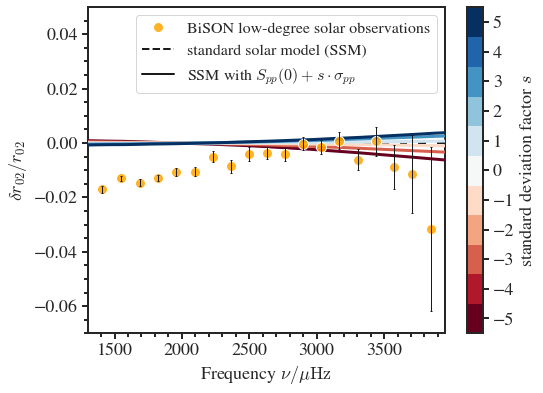

In [27]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)


fig, ax = plt.subplots(figsize=(8,6))

### plot models at different sigmas 
sigmas = range(-5, 6, 1)#range(-5, 6, 1)
for ii in sigmas:
    if ii % 2 == 0: 
        continue 
    rate_DF = pd.read_table('r2/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r02s = r02(rate_DF)
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
    #plt.plot(rate_r02s['freqs'], rate_r02s['ratios'], 'k.')

### plot solar data 
SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
#obs_ = (obs_-SSM_)/SSM_ #+ 0.017
obs_ = (obs_-SSM_)/SSM_ 
lab = 'BiSON low-degree solar observations'
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
         markeredgecolor='white', label=lab, zorder=100)
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

### SSM at y=0
#plt.axhline(0, ls='--', c='k', zorder=99)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
cbar.ax.minorticks_off()
plt.legend()

#plt.axvline(3090, ls='--', c='k')
#ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

ax.set_rasterization_zorder(9999)
plt.ylim([-0.07, 0.05])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')
#plt.show()

filename = 'S02_r02'
plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
plt.show()

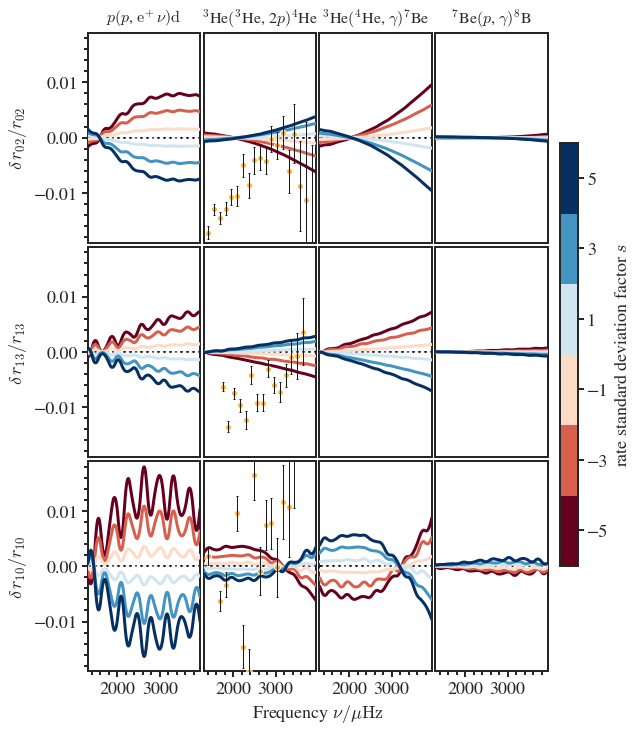

In [28]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(8.25, 11.75))
axes = ax.flatten()

plt.ylim([-0.019, 0.019])
plt.xlim([1300, 3950])

counter = 0
for ratio in [(r'r_{02}', r02), (r'r_{13}', r13), (r'r_{10}', r10)]:
    ratios = ratio[1](DF)
    SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    
    if ratio[1] == r02:
        obs_ratios = obs_r02s
        std = std_r02s
    elif ratio[1] == r13:
        obs_ratios = obs_r13s
        std = std_r13s
    elif ratio[1] == r10:
        obs_ratios = obs_r10s
        std = std_r10s
    
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        #ax = plt.subplot(3,3,counter, sharex=True, sharey=True)
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        if ratio[1] != r10:
            ax.xaxis.set_visible(False)
        
        if ratio[1] == r02:
            if rate == 'r1':
                ax.set_title(r'$p(p$, $\rm{e}^{+}\,\nu)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3$He$(^3$He, 2$p)^4$He')
            elif rate == 'r3':
                ax.set_title(r'$^3$He$(^4$He, $\gamma)^7$Be')
            elif rate == 'r5':
                ax.set_title(r'$^7$Be$(p$, $\gamma)^8$B')
        
        if rate == 'r1':
            ax.set_ylabel(r'$\delta\,'+ratio[0]+r'/'+ratio[0]+'$')
        
        # plot data
        if rate == 'r2':
            SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
            obs_ = unumpy.uarray(obs_ratios['ratios'], std)
            obs_ = (obs_-SSM_)/SSM_ 
            ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=12, 
                     markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                     markeredgecolor='white', label=lab, zorder=100)
            ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                         fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        sigmas = range(-5, 6, 2)
        for ii in sigmas:
            rate_DF = pd.read_table(rate + '/' + str(ii) + '.freqs', sep='\s+', comment='#',
                names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
            rate_ratios = ratio[1](rate_DF)
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
            ax.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=6, zorder=2)

plt.subplots_adjust(wspace=0.03, hspace=0.02)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.25, 0.03, 0.5])
#cb = plt.colorbar(cax=cbar_ax)
#cb.ax.set_ylabel(r'$M/M_\odot$')
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'rate standard deviation factor $s$')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')

#plt.tight_layout()
#plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

# Interpolate rates 

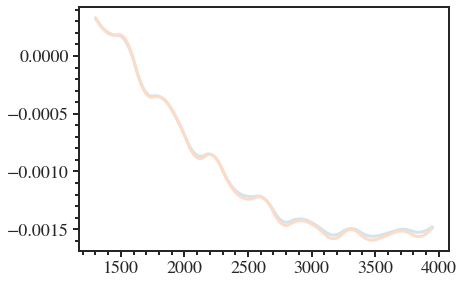

In [47]:
rate = 'r1'
ratio = r02

ratios = ratio(DF)
SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

#sigmas = range(-5, 6, 2)
#for ii in sigmas:
sigma = 1
rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
rate_ratios = ratio(rate_DF)
interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)


sigma = -1
rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
rate_ratios = ratio(rate_DF)
interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.plot(freqs, -(interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3);

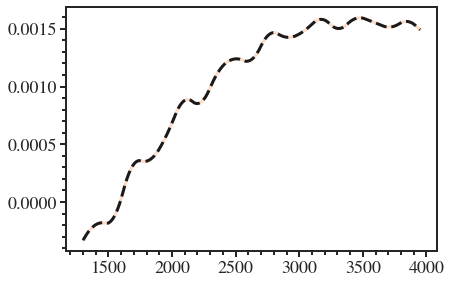

In [48]:
knots, coefs, spl_degree = sp.interpolate.splrep(freqs, (interp-SSM)/SSM)
plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)
plt.plot(freqs, sp.interpolate.BSpline(knots, coefs, spl_degree)(freqs), '--', lw=3, c='k', zorder=4);

In [49]:
sigmas = range(-5, 6, 2)
spl_degree = 3
all_coefs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    knots, coefs, _ = sp.interpolate.splrep(freqs, (interp-SSM)/SSM, k=spl_degree)
    all_coefs += [coefs]
    #print(coefs)
    #print(np.any(knots-knots2))
all_coefs = np.array(all_coefs)
all_coefs

array([[-0.00172816, -0.00171314, -0.00169091, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00095825, -0.00094897, -0.00093523, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00033056, -0.00032723, -0.00032227, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00032847,  0.00032537,  0.00032075, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00095718,  0.00094803,  0.00093447, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00157153,  0.00155589,  0.00153263, ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
spls_single = []
for jj in range(len(knots)):
    spls_single += [interp1d(sigmas, all_coefs[:,jj], kind=2, fill_value='extrapolate')]

def rate_interp_single(sigma):
    coefs = np.array([spls_single[jj](sigma) for jj in range(len(knots))])
    return sp.interpolate.BSpline(knots, coefs, spl_degree)

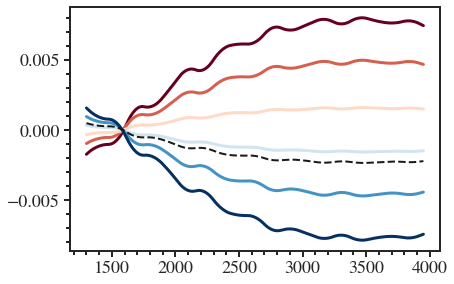

In [52]:
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)

plt.plot(freqs, rate_interp_single(1.5)(freqs), 'k--', zorder=10);

In [53]:
SSM_ = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])

rel_diffs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    rel_diffs += [(interp-SSM)/SSM]
rel_diffs = np.array(rel_diffs)

In [54]:
rate = 'r1'
ratio = r02
ratios = ratio(DF)
SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])

interp_rel_diffs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
    interp_rel_diffs += [(interp-SSM_)/SSM_]
interp_rel_diffs = np.array(interp_rel_diffs)

In [55]:
pt_spls_single = []
for jj in range(interp_rel_diffs.shape[1]):
    pt_spls_single += [interp1d(sigmas, interp_rel_diffs[:,jj], kind=2, fill_value='extrapolate')]

def rate_interp_point_single(sigma):
    return np.array([pt_spl(sigma) for pt_spl in pt_spls_single])

In [56]:
def plot_sigma_single(sigma):
    for jj in range(rel_diffs.shape[0]):
        plt.plot(freqs, rel_diffs[jj], '-', lw=3, c=cmap.to_rgba(sigmas[jj]), zorder=3)
    
    plt.plot(freqs, rate_interp_single(sigma)(freqs), 'k--', zorder=10)
    plt.plot(obs_ratios['freqs'], rate_interp_point_single(sigma), 'k.', ms=15, zorder=11)
    plt.xlabel(r'Frequency $\nu/\mu$Hz')
    plt.ylabel(r'Ratio $r_{0,2}$')
    plt.show()

#plot_sigma(3)
interact(plot_sigma_single, 
         sigma=FloatSlider(min=-6, max=6, step=0.01, value=3, continuous_update=True));

interactive(children=(FloatSlider(value=3.0, description='sigma', max=6.0, min=-6.0, step=0.01), Output()), _d…

In [60]:
def rate_interp_points(rate, ratio_name, sigma): 
    return np.array([pt_spl(sigma) for pt_spl in rate_pt_spls[(rate, ratio_name)]])

def rate_interp(rate, ratio_name, sigma): 
    spls = rate_spls[(rate, ratio_name)]
    coefs = np.array([spls[jj](sigma) for jj in range(len(knots))])
    return sp.interpolate.BSpline(knots, coefs, spl_degree)

freqs_ = np.linspace(freqs[0], freqs[-1], 50)
sigmas_ = [-5, -3, -1, 0, 1, 3, 5]

rate_pt_spls = {}
rate_spls = {}
for rate in ['r1', 'r2', 'r3', 'r5']:
    for ratio_name in ['r02', 'r13', 'r10']:
        
        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
        elif ratio_name == 'r10':
            ratio = r10
            ratios = r10s
            obs_ratios = obs_r10s
        
        SSM  = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs_)
        SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        
        interp_rel_diffs = []
        all_coefs = []
        for sigma in sigmas_:
            if sigma == 0:
                rate_DF = SSM
                rate_ratios = ratios
            else:
                rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
                    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
                rate_ratios = ratio(rate_DF)
            
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')
            interp_rel_diffs += [(interp(obs_ratios['freqs'])-SSM_)/SSM_]
            knots, coefs, _ = sp.interpolate.splrep(freqs_, (interp(freqs_)-SSM)/SSM, k=spl_degree)
            all_coefs += [coefs]
        interp_rel_diffs = np.array(interp_rel_diffs)
        all_coefs = np.array(all_coefs)
        
        pt_spls = []
        for jj in range(interp_rel_diffs.shape[1]):
            pt_spls += [interp1d(sigmas_, interp_rel_diffs[:,jj], kind=2, fill_value='extrapolate')]
        rate_pt_spls[(rate, ratio_name)] = pt_spls
        #rate_interp_points[(rate, ratio_name)] = lambda sigma: np.array([pt_spl(sigma) for pt_spl in pt_spls])
        #print(len(rate_interp_points[(rate, ratio_name)](0)))
        
        # interpolate between the coefficients of the Bsplines 
        spls = []
        for jj in range(len(knots)):
            spls += [interp1d(sigmas_, all_coefs[:,jj], kind=2, fill_value='extrapolate')]
        rate_spls[(rate, ratio_name)] = spls
        #rate_interp[(rate, ratio_name)] = lambda sigma: \
        #    sp.interpolate.BSpline(knots, np.array([spls[jj](sigma) for jj in range(len(knots))]), spl_degree)

In [61]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

SSM_r02 = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r13 = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r10 = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')(freqs_)

SSM_r02_ = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(obs_r02s['freqs'])
SSM_r13_ = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(obs_r13s['freqs'])
SSM_r10_ = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')(obs_r10s['freqs'])

def plot_sigmas(sigma1, sigma2, sigma3, sigma5, offset1, offset2, offset3):
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8.25, 8.25))
    #axes = ax.flatten()

    plt.ylim([-0.075, 0.075])
    plt.xlim([1300, 3950])
    
    all_ratios = []
    
    counter = 0
    for ratio_name in ['r13']:

        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            offset = offset1
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            offset = offset2
        elif ratio_name == 'r10':
            ratio = r10
            ratios = r10s
            obs_ratios = obs_r10s
            std = std_r10s
            SSM = SSM_r10
            SSM_ = SSM_r10_
            latex = r'r_{10}'
            offset = offset3
        
        #ax = axes[counter]
        #counter += 1
        ax.set_ylabel(r'$\delta\,'+latex+r'/'+latex+'$')
        
        # plot interpolated rates 
        lines = np.zeros(len(freqs_)) + offset
        points = np.zeros(len(obs_ratios['freqs'])) + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            lines += rate_interp(rate, ratio_name, sigma)(freqs_)
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
        ax.plot(freqs_, lines, 'r-', lw=3, zorder=3)
        ax.plot(obs_ratios['freqs'], points, 'k.', ms=10, zorder=4)
        
        # plot data
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=25, 
                 markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                 markeredgecolor='white', label=lab, zorder=100)
        ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                     fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_ratios['freqs'], np.repeat(0, len(obs_ratios['freqs'])), 'w.', ms=25, zorder=2)
    
    resid = rel_ratios_obs[len(std_r02s):-len(std_r10s)] - np.array(all_ratios)
    chi2 = np.dot(resid, np.dot(Sigma_inv[len(std_r02s):-len(std_r10s), len(std_r02s):-len(std_r10s)], resid))
    ax.set_title(r'$\chi^2 = ' + str(chi2/(len(rel_ratios_obs)-7)) + r'$')
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    
    plt.subplots_adjust(wspace=0.03, hspace=0.02)

    #plt.tight_layout()
    #plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
    plt.show()

interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=5.7352, continuous_update=True),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=0.1737, continuous_update=True),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=-0.6518, continuous_update=True),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=2.9367, continuous_update=True),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.0061, continuous_update=True),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.0184, continuous_update=True),
         offset3=FloatSlider(min=-0.03, max=0.03, step=0.001, value=0.0001, continuous_update=True));

interactive(children=(FloatSlider(value=5.7352, description='sigma1', max=8.0, min=-8.0, step=0.05), FloatSlid…

In [62]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

SSM_r02 = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r13 = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r10 = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')(freqs_)

SSM_r02_ = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(obs_r02s['freqs'])
SSM_r13_ = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(obs_r13s['freqs'])
SSM_r10_ = interp1d(r10s['freqs'], r10s['ratios'], kind=2, fill_value='extrapolate')(obs_r10s['freqs'])

def plot_sigmas(sigma1, sigma2, sigma3, sigma5, offset1, offset2, offset3):
    fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(8.25, 11.75))
    axes = ax.flatten()

    plt.ylim([-0.075, 0.075])
    plt.xlim([1300, 3950])
    
    all_ratios = []
    
    counter = 0
    for ratio_name in ['r02', 'r13', 'r10']:

        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            offset = offset1
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            offset = offset2
        elif ratio_name == 'r10':
            ratio = r10
            ratios = r10s
            obs_ratios = obs_r10s
            std = std_r10s
            SSM = SSM_r10
            SSM_ = SSM_r10_
            latex = r'r_{10}'
            offset = offset3
        
        ax = axes[counter]
        counter += 1
        ax.set_ylabel(r'$\delta\,'+latex+r'/'+latex+'$')
        
        # plot interpolated rates 
        lines = np.zeros(len(freqs_)) + offset
        points = np.zeros(len(obs_ratios['freqs'])) + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            lines += rate_interp(rate, ratio_name, sigma)(freqs_)
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
        ax.plot(freqs_, lines, 'r-', lw=3, zorder=3)
        ax.plot(obs_ratios['freqs'], points, 'k.', ms=10, zorder=4)
        
        # plot data
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=25, 
                 markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                 markeredgecolor='white', label=lab, zorder=100)
        ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                     fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_ratios['freqs'], np.repeat(0, len(obs_ratios['freqs'])), 'w.', ms=25, zorder=2)
    
    #for ii, jj in (enumerate(zip(rel_ratios_obs, all_ratios))):
        #print(ii,jj, np.diff(jj))
    #rel_ratio_obs_ = rel_ratios_obs[:len(std_r02s)-1] + 
    #                 rel_ratios_obs[len(std_r02s):len(std_r02s)+len(std_r02s)-1] +
    #                 rel_ratios_obs[len(std_r02s)+len(std_r02s):-1]
    #np.hstack(( (obs_r02s['ratios'][:-1] - SSM_r02[:-1])/SSM_r02[:-1],
    #                         (obs_r13s['ratios'][:-1] - SSM_r13[:-1])/SSM_r13[:-1],
    #                         (obs_r10s['ratios'][:-1] - SSM_r10[:-1])/SSM_r10[:-1] ))
    resid = rel_ratios_obs - np.array(all_ratios)
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid))
    axes[0].set_title(r'$\chi^2 = ' + str(chi2/(len(rel_ratios_obs)-7)) + r'$')
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    
    plt.subplots_adjust(wspace=0.03, hspace=0.02)

    #plt.tight_layout()
    #plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
    plt.show()

# 6.16087160e+00, -1.10520235e+00, -9.17877647e+00,  2.95086240e+00, -1.01435599e-03, -1.87934212e-02,  7.79014805e-03
interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=-7.25, continuous_update=False),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.02, continuous_update=False),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.01, continuous_update=False),
         offset3=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.02, continuous_update=False));

interactive(children=(FloatSlider(value=-7.25, continuous_update=False, description='sigma1', max=8.0, min=-8.…

In [75]:
# 6.16087160e+00, -1.10520235e+00, -9.17877647e+00,  2.95086240e+00, -1.01435599e-03, -1.87934212e-02,  7.79014805e-03
interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=6.16087160e+00, continuous_update=False),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=-1.10520235e+00, continuous_update=False),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=-9.17877647e+00, continuous_update=False),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=2.95086240e+00, continuous_update=False),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-1.01435599e-03, continuous_update=False),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-1.87934212e-02, continuous_update=False),
         offset3=FloatSlider(min=-0.03, max=0.03, step=0.001, value=7.79014805e-03, continuous_update=False));

interactive(children=(FloatSlider(value=6.1608716, continuous_update=False, description='sigma1', max=8.0, min…

# MCMC 

In [63]:
def lnprior(theta):
    #print("lnprior")
    _theta = np.copy(theta)
    return 0.0 # flat prior 
    _lnprior = sp.stats.multivariate_normal.logpdf(
        _theta[:-3], mean=np.zeros(len(_theta[:-3])), cov=np.diag(np.ones(len(_theta[:-3]))))
    return _lnprior 

zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))
zeros_r10 = np.zeros(len(obs_r10s['freqs']))

def lnlike(theta):
    _theta = np.copy(theta)
    sigma1, sigma2, sigma3, sigma5, offset1, offset2, offset3 = _theta
    
    all_ratios = []
    for ratio_name in ['r02', 'r13', 'r10']:
        if ratio_name == 'r02':
            zeros = zeros_r02
            offset = offset1
        elif ratio_name == 'r13':
            zeros = zeros_r13
            offset = offset2
        elif ratio_name == 'r10':
            zeros = zeros_r10
            offset = offset3
        points = zeros + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid))
    return -chi2/2.

def lnprob(theta, i=0, N=0, size=0):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [67]:
theta = [0, 0, 0, 0, 0, 0, 0]

ndim, nwalkers = len(theta), len(theta)*10
np.random.seed(0)
pos = np.array([[np.random.normal(theta[ii], 5 if ii < 4 else 0.01) 
                 for ii in range(ndim)]
       for jj in range(nwalkers)])

pos.shape

(70, 7)

In [73]:
sp.optimize.minimize(lambda x: -lnprob(x), x0=theta, method='Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 472144.769424
         Iterations: 679
         Function evaluations: 1049


 final_simplex: (array([[ 6.16087160e+00, -1.10520235e+00, -9.17877647e+00,
         2.95086240e+00, -1.01435599e-03, -1.87934212e-02,
         7.79014805e-03],
       [ 6.16082821e+00, -1.10519405e+00, -9.17886282e+00,
         2.95093723e+00, -1.01442906e-03, -1.87935735e-02,
         7.79018576e-03],
       [ 6.16089182e+00, -1.10520581e+00, -9.17885696e+00,
         2.95090404e+00, -1.01452598e-03, -1.87936417e-02,
         7.79031324e-03],
       [ 6.16082615e+00, -1.10519395e+00, -9.17879721e+00,
         2.95089657e+00, -1.01455618e-03, -1.87932096e-02,
         7.79014563e-03],
       [ 6.16084988e+00, -1.10519811e+00, -9.17880337e+00,
         2.95088979e+00, -1.01430796e-03, -1.87938306e-02,
         7.79003876e-03],
       [ 6.16085740e+00, -1.10519970e+00, -9.17876922e+00,
         2.95086461e+00, -1.01431511e-03, -1.87937904e-02,
         7.79021514e-03],
       [ 6.16083656e+00, -1.10519564e+00, -9.17886520e+00,
         2.95093481e+00, -1.01486356e-03, -1.87932169e-02,
 

In [68]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=4)
sampler.run_mcmc(pos, 100, progress=True)

100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


State([[ 6.15694482e+00  1.22981340e-01 -6.91724297e-01  2.65212496e+00
  -2.58736300e-03 -1.38448634e-02  9.44055422e-04]
 [ 6.11538826e+00  1.28217603e-01 -7.10366416e-01  2.72490592e+00
  -2.92145572e-03 -1.45074677e-02  6.91687103e-04]
 [ 6.05290399e+00  2.54171708e-01 -5.71515740e-01  2.56800340e+00
  -2.53931521e-03 -1.26788956e-02  7.69565553e-04]
 [ 6.06539142e+00  1.39048813e-01 -7.62729985e-01  2.65125492e+00
  -2.24150776e-03 -1.37266905e-02  7.90486469e-04]
 [ 6.17125133e+00  1.93663626e-01 -6.53638505e-01  2.74410244e+00
  -2.96144285e-03 -1.36870684e-02  9.58270807e-04]
 [ 6.09037695e+00  2.17132847e-01 -5.97322856e-01  2.78627957e+00
  -2.16226818e-03 -1.28088111e-02  6.71057290e-04]
 [ 5.99993516e+00  9.74256522e-02 -6.41556515e-01  2.59668056e+00
  -2.41741672e-03 -1.44635627e-02  5.94265134e-04]
 [ 6.03310466e+00  2.09559860e-01 -6.28183105e-01  2.51842550e+00
  -2.89620536e-03 -1.30117148e-02  7.52050203e-04]
 [ 6.13505354e+00  1.80641006e-01 -7.27243129e-01  2.65370

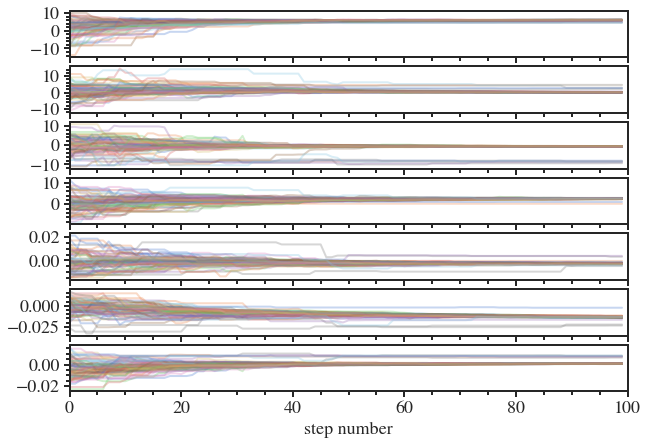

In [70]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
arr = sampler.chain
for i in range(ndim):
    ax = axes[i]
    for jj in range(arr.shape[0]):
        ax.plot(arr[jj, :, i], alpha=0.3)
    ax.set_xlim(0, arr.shape[1])
    #ax.set_ylabel(X_labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [71]:
arr = sampler.chain
arr = arr[:, -250:, :].reshape((-1, ndim))
#arr = arr.reshape((-1, ndim))
arr.shape

(7000, 7)

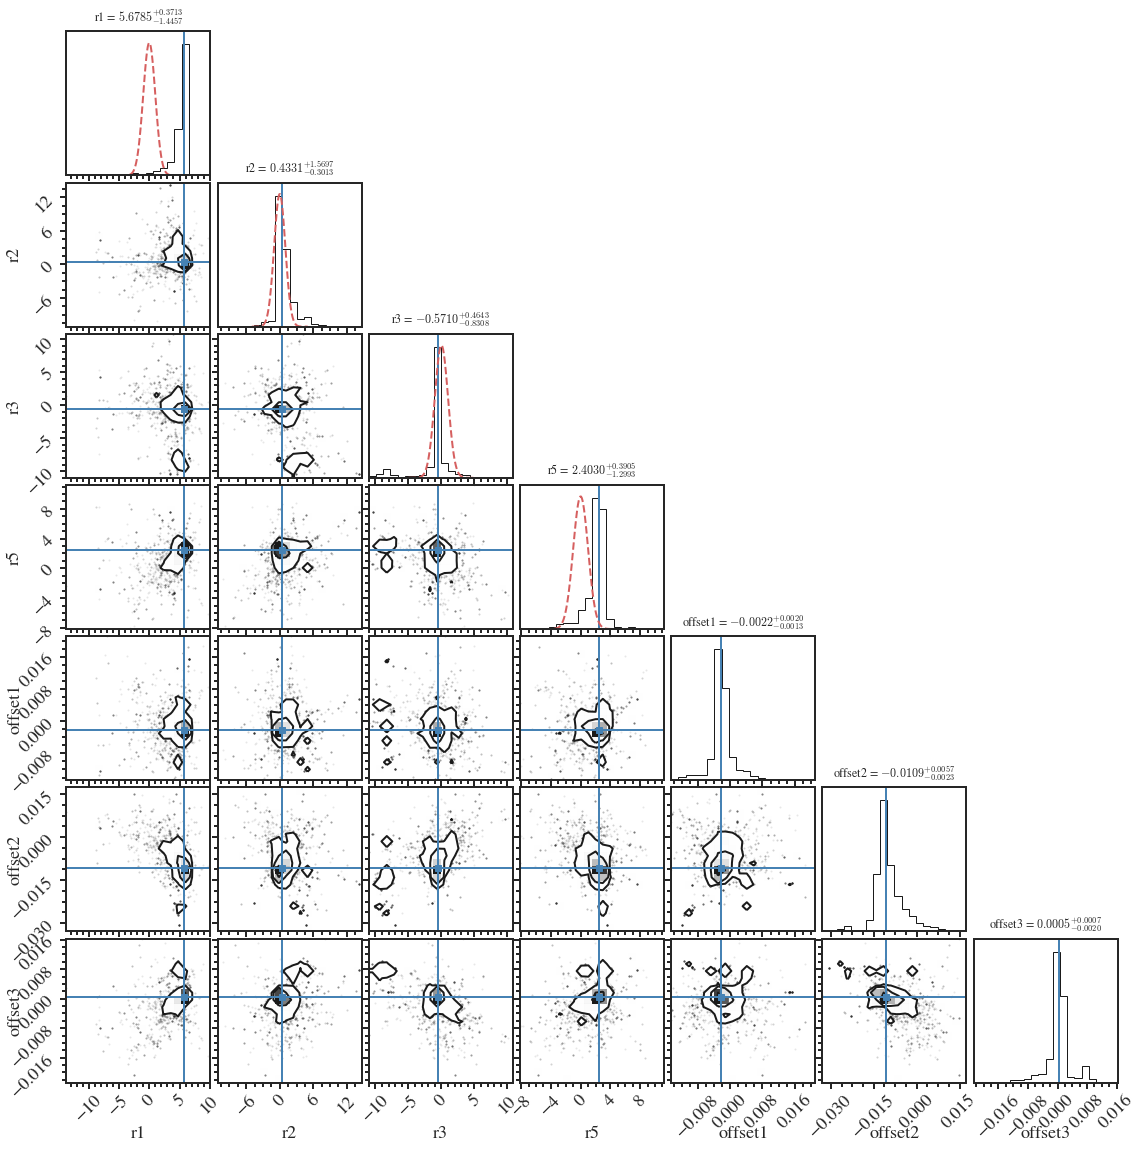

In [72]:
fig = corner.corner(arr, labels=['r1', 'r2', 'r3', 'r5', 'offset1', 'offset2', 'offset3'], 
    show_titles=True, title_fmt='.4f',
    #color='b',
    truths=np.percentile(arr, 50, axis=0),
    #range=[(X_min[i], X_max[i]) for i in range(len(X_labels))],
    #truth_color='b',
    title_kwargs={"fontsize": 12})

axes = np.array(fig.axes).reshape((arr.shape[1], arr.shape[1]))

for ii in range(len(axes)):
    if ii < 4:
        ax = axes[ii, ii]#axes[ii, ii]
        # plot priors 
        xs = np.linspace(-5, 5, num=100)
        ys = sp.stats.norm.pdf(xs, loc=0, scale=1)
        ymax = ax.get_ylim()[1]
        ax.plot(xs, ymax * ys/max(ys) * 0.92, 'r--')

fig.show()

# Analyze all solar models 

In [24]:
filenames = ['fobs_3He_eql_d_02c_eq.txt',
    'fobs_AGS05_d_21c.txt',
    'fobs_AGSS09_d_22c.txt',
    'fobs_Adelb11_d_34c.txt',
    'fobs_Age_d_06c.txt',
    'fobs_CM_d_24c.txt',
    'fobs_DVc_d_18c.txt',
    'fobs_Dc_d_17c.txt',
    'fobs_GS98_d_37c.txt',
    'fobs_L_s_d_41c.txt',
    'fobs_Liv05_d_40c.txt',
    'fobs_NACRE_d_39c.txt',
    'fobs_No_diff_03c.txt',
    'fobs_No_el_scrn_d_20c.txt',
    'fobs_OP05_d_36c.txt',
    'fobs_OPAL96_d_07c.txt',
    'fobs_Opc_6_5_d_16c.txt',
    'fobs_Opc_7_0_d_15c.txt',
    'fobs_R_s_d_05c.txt',
    'fobs_S_d_02c.txt',
    'fobs_Surf_opac_d_35c.txt']

In [25]:
models = []
model_r02s = []

for filename in filenames:
    rate_DF = pd.read_table('https://raw.githubusercontent.com/jcd11/LRSP_models/main/frequencies/'+filename, 
        sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    model_r02s += [r02(rate_DF)]
    models += [rate_DF]

In [243]:
firsts = []
for ii, filename in enumerate(filenames):
    rate_r02s = model_r02s[ii]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    firsts += [-((interp-SSM)/SSM)[0]]

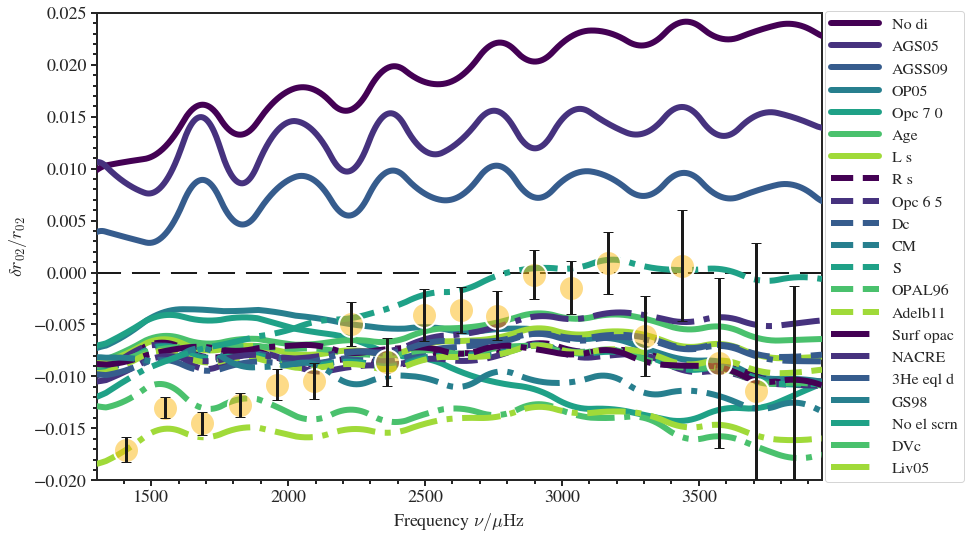

In [313]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

fig, ax = plt.subplots(figsize=(13,8.6))

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

firsts = []
for ii, filename in enumerate(filenames):
    rate_r02s = model_r02s[ii]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(1500)
    firsts += [-interp]
ordering = list(np.argsort(firsts))

for ii, jj in enumerate(ordering):
    filename = filenames[jj]
    rate_r02s = model_r02s[jj]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    if ii >= 2*len(filenames)//3:
        style = '-.'
    elif ii >= len(filenames)//3:
        style = '--'
    else: 
        style = '-'
    plt.plot(freqs, (interp-SSM)/SSM, style, lw=6, zorder=3, label=' '.join(filename[5:-10].split('_')), 
             c=cmap2.to_rgba(ii%(len(filenames)//3)))

### plot solar data 
SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=50, mew=2,
         markerfacecolor=matplotlib.colors.to_rgba('#FDB813', 0.5),
         markeredgecolor='white', zorder=100)
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=40, lw=0, elinewidth=3, zorder=101, capsize=5)

### SSM at y=0
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', lw=2, zorder=1)
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-')

plt.legend(bbox_to_anchor=(1.1, 0.5), loc='center', handlelength=3)

ax.set_rasterization_zorder(9999)
plt.ylim([-0.02, 0.025])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')

filename = 'S02_r02_all'
#plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
plt.show()